<h4>This is the notebook of multiple image classification.
    
<br> Mainly fastai Library is used for this notebook.
</h4>

# import library

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# path of Train images

In [3]:
a = '/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train'


In [4]:
path = Path(a)
path.ls()

(#13) [Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Honda'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Nissan'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Hyundai'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Subaru'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/export.pkl'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Suzuki'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Lexus'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Mazda'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Toyota'),Path('/home/sanarip03/Desktop/бренд_машин/imgs_zip/imgs/train/Kia')...]

# Data load for training

In [5]:
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


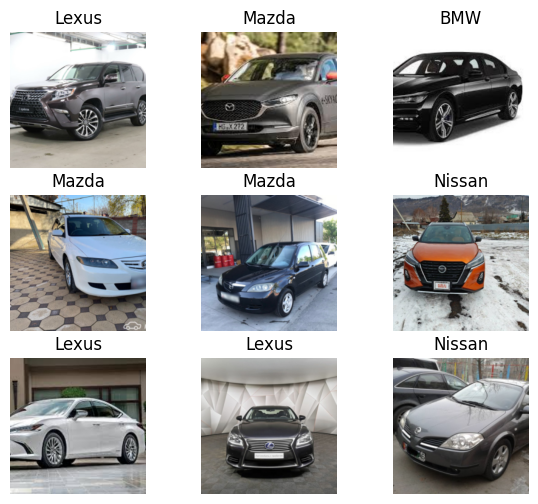

In [6]:
data.show_batch(figsize=(7,6))

In [7]:
data.c #number of classes

12

In [8]:
len(data.train_ds) #length of train data

1962

In [9]:
len(data.valid_ds) # lentgh of test data

490

In [10]:
print(data.vocab) #classes of data

['Audi', 'BMW', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Nissan', 'Subaru', 'Suzuki', 'Toyota']


# cration of model

In [11]:
learn = cnn_learner(data, models.resnet18, model_dir='./model', path = Path("."))

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResN

# finding LR

In [15]:
learn.lr_find()
# learn.recorder.plot_model(suggestions=True)

/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/venv/lib/python3.10/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

In [12]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(50,slice(lr1,lr2))

# Hyper Parameter Tuning

In [13]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

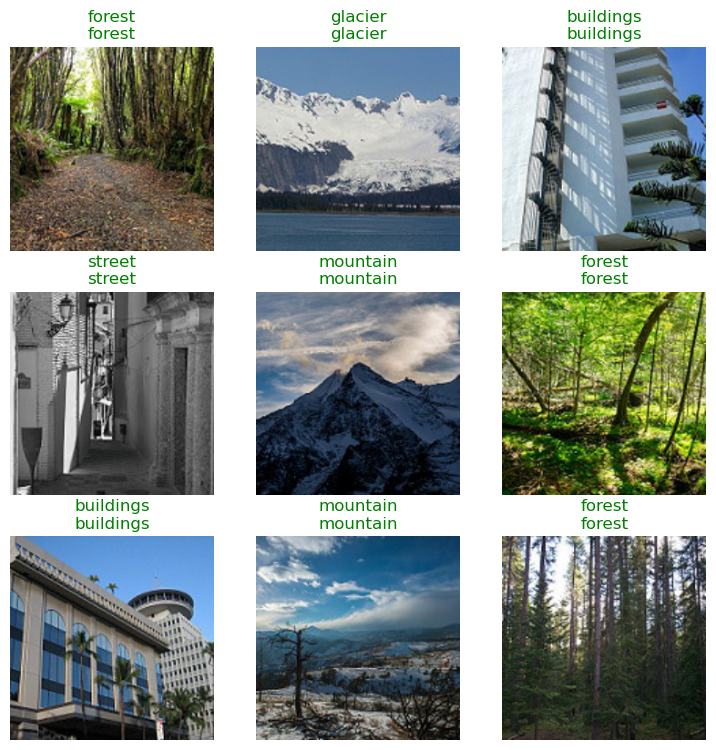

In [14]:
learn.show_results()

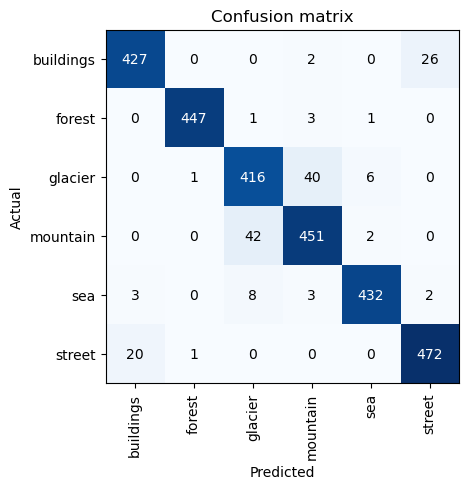

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Interpretation of result

In [16]:
# Counting the values of losses
interp.top_losses(largest=True)

(TensorBase([18.2713, 13.2360, 12.8618,  ..., -0.0000, -0.0000, -0.0000]),
 TensorBase([1147, 1333, 1422,  ...,   35, 2788, 2290]))

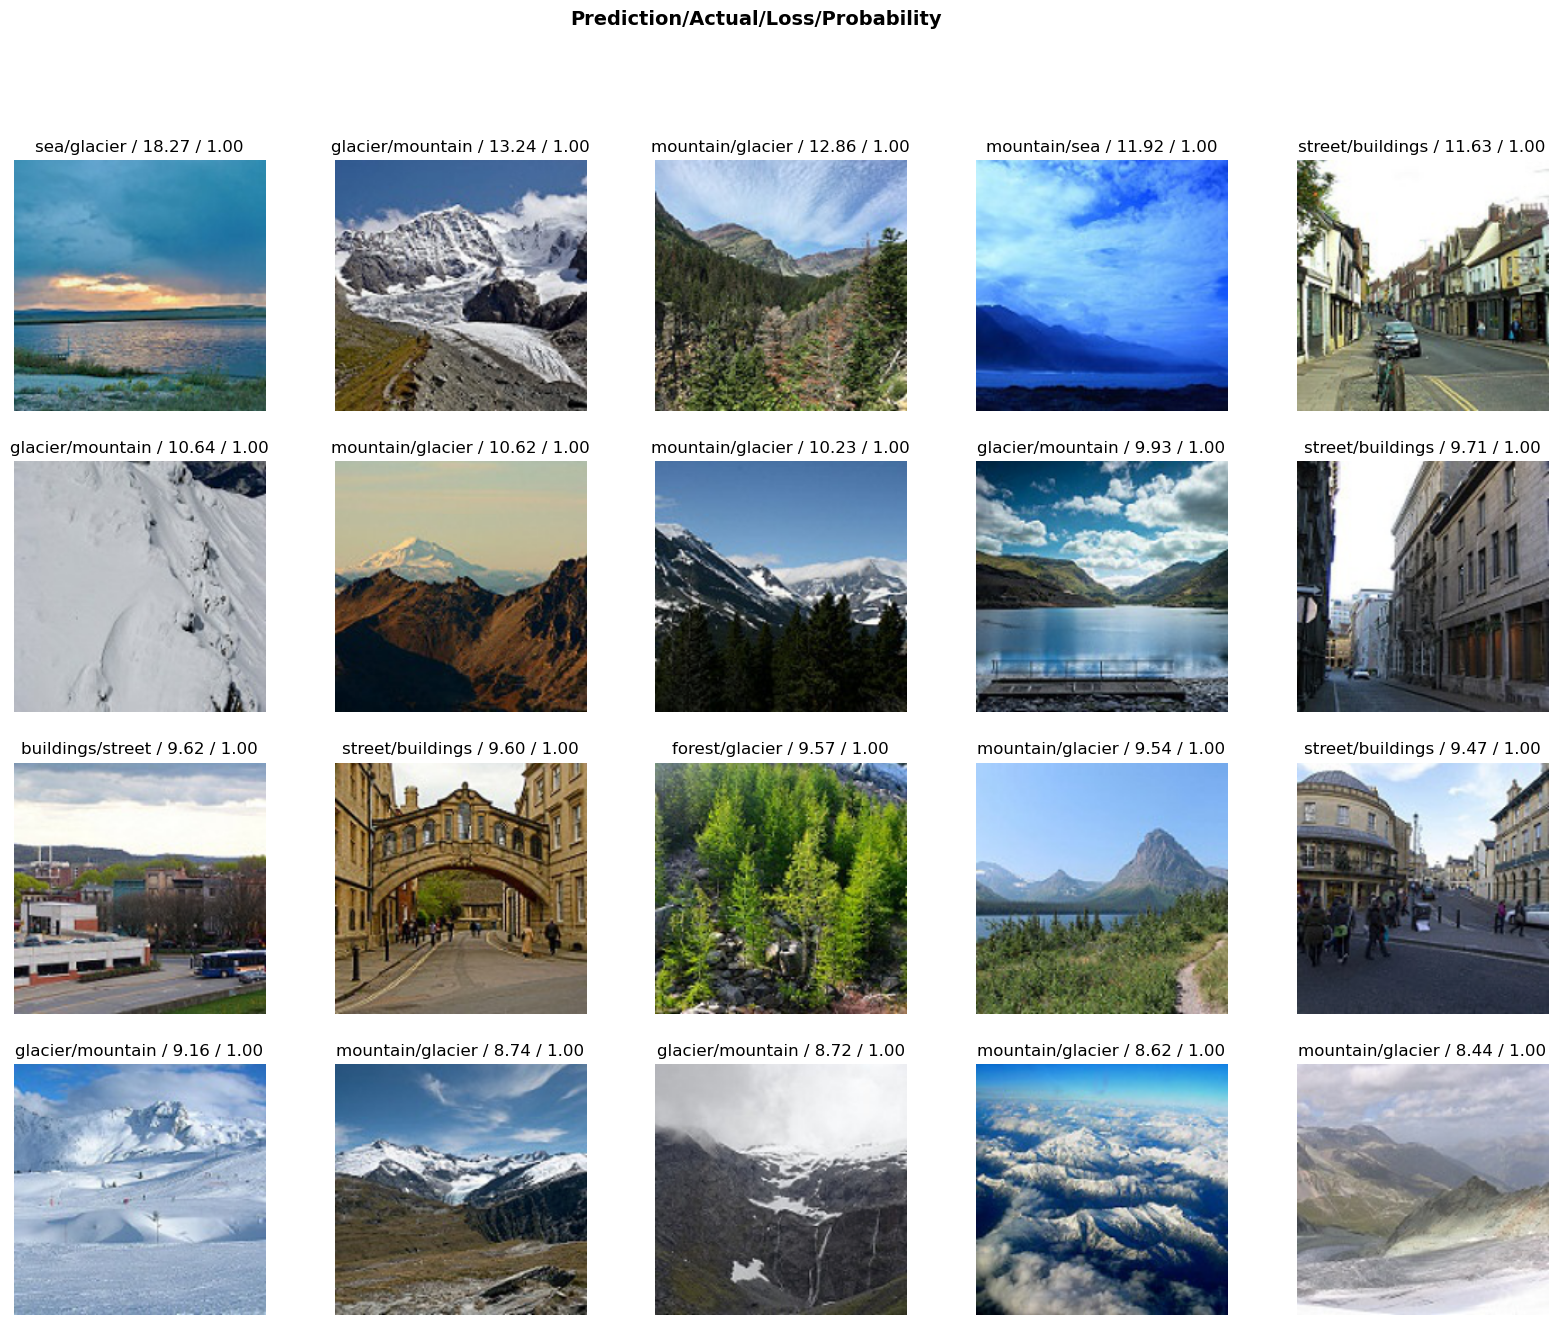

In [17]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

# prediction using the trained model

In [18]:
im = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
im_t = cast(array(im), TensorImage)

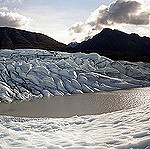

In [19]:
im

In [20]:
im_t #showing image tensor

TensorImage([[[196, 203, 231],
              [180, 185, 214],
              [162, 168, 194],
              ...,
              [251, 245, 245],
              [248, 242, 242],
              [250, 245, 242]],

             [[167, 173, 199],
              [165, 171, 195],
              [167, 174, 193],
              ...,
              [231, 227, 226],
              [235, 231, 228],
              [244, 240, 237]],

             [[167, 172, 191],
              [161, 167, 183],
              [171, 177, 191],
              ...,
              [238, 237, 233],
              [245, 244, 240],
              [238, 237, 232]],

             ...,

             [[161, 160, 156],
              [233, 232, 228],
              [255, 255, 250],
              ...,
              [121, 129, 132],
              [155, 163, 166],
              [100, 107, 117]],

             [[127, 126, 124],
              [161, 160, 156],
              [210, 209, 204],
              ...,
              [184, 189, 192],
          

# Saving the model

In [12]:
learn.export(Path("/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/export.pkl"))
learn.model_dir = "/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main"
learn.save("stage-1")

Path('/home/sanarip03/Desktop/бренд_машин/Image-Classification-using-fastai-main/stage-1.pth')

In [13]:
learn = load_learner('export.pkl')

In [14]:
from PIL import Image
img = Image.open('/kaggle/input/intel-image-classification/seg_pred/seg_pred/10079.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)
im_t = cast(array(img_resized), TensorImage)
# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")
img

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/intel-image-classification/seg_pred/seg_pred/10079.jpg'